In [1]:
import requests
import json
import pandas as pd


In [2]:

#import prettytable
headers = {'Content-type': 'application/json'}
# The series ID CUUR0000SA0L1E is Consumer Price Index - All Urban Consumers

data = json.dumps({"seriesid": ['CUUR0000SA0L1E'],"startyear":"2012", "endyear":"2021"})


p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)

json_data = json.loads(p.text)

In [3]:
CPI_df = pd.DataFrame(json_data['Results']['series'][0]['data'])

In [8]:
CPI_df = CPI_df[['year', 'periodName','value']].set_index('year')

In [22]:
CPI_df['value'] = CPI_df['value'].astype(float)
CPI_df.sort_index(inplace=True)

In [23]:
CPI_df

,periodName,value
year,,
2012,January,227.237
2012,December,231.033
2012,November,231.263
2012,October,231.276
2012,September,230.780
...,...,...
2021,April,273.968
2021,May,275.893
2021,June,278.218


<AxesSubplot:xlabel='year'>

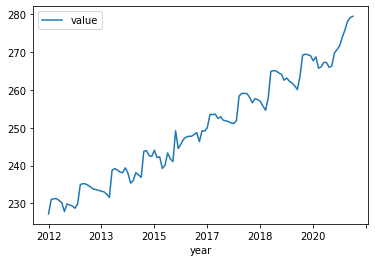

In [25]:
CPI_df.plot()